# importing libraries and .csv file

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import datetime
import gc
import random
# import xgboost as xgb

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd. set_option('display.max_columns', 1000) 
pd. set_option('display.max_rows', 1000)

In [88]:
df = pd.read_csv(r'./H2HBABBA2686.csv')

In [89]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200793513,KROGER us,NaN,2020.0,1.930780e+09,2020-04-12,20200413,20200412,20200427.0,USD,RV,1.0,NaN,98432.85,20200412.0,NAA8,1.930780e+09,1
1,U001,0200712105,WALG,NaN,2020.0,1.930659e+09,2020-03-17,20200318,20200317,20200401.0,USD,RV,1.0,NaN,91637.74,20200317.0,NAA8,1.930659e+09,1
2,U001,0100043936,PAPA JO associates,2019-07-09 00:00:00,2019.0,1.929554e+09,2019-06-27,20190628,20190627,20190707.0,USD,RV,1.0,NaN,17661.07,20190627.0,NA10,1.929554e+09,0
3,U001,200772670,ASSOCIAT foundation,2019-07-22 00:00:00,2019.0,1.929578e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,1.0,NaN,99713.10,20190705.0,NAU5,1.929578e+09,0
4,U001,0200759878,SA,2019-02-08 00:00:00,2019.0,1.928625e+09,2019-01-17,20190115,20190117,20190201.0,USD,RV,1.0,NaN,15603.00,20190117.0,NAH4,1.928625e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200744019,TARG trust,2019-11-26 00:00:00,2019.0,1.930030e+09,2019-10-19,20191018,20191019,20191128.0,USD,RV,1.0,NaN,2312.26,20191019.0,NAWU,1.930030e+09,0
49996,U001,0200769623,WAL-MAR us,2019-06-26 00:00:00,2019.0,1.929494e+09,2019-06-16,20190615,20190616,20190701.0,USD,RV,1.0,NaN,5525.09,20190616.0,NAH4,1.929494e+09,0
49997,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930747e+09,2020-04-05,20200404,20200405,20200420.0,USD,RV,1.0,NaN,2019.69,20200405.0,NAH4,1.930747e+09,1
49998,U001,0200769623,WAL-MAR co,2019-01-22 00:00:00,2019.0,1.928610e+09,2019-01-11,20190111,20190111,20190126.0,USD,RV,1.0,NaN,485.06,20190111.0,NAH4,1.928610e+09,0


# checking for null entries

In [90]:
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

# checking datatype

In [91]:
df.nunique(axis=0)

business_code                 5
cust_number                1435
name_customer              4207
clear_date                  403
buisness_year                 2
doc_id                    48798
posting_date                503
document_create_date        507
document_create_date.1      504
due_in_date                 549
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44263
baseline_create_date        508
cust_payment_terms           72
invoice_id                48792
isOpen                        2
dtype: int64

In [92]:
df.drop(['document_create_date.1','name_customer','invoice_id','document type','posting_id','area_business','isOpen','baseline_create_date'],axis=1,inplace=True)

In [93]:
df.drop_duplicates(subset='doc_id',keep='first',inplace=True)

In [108]:
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])

In [109]:
Final_test = df[df.clear_date.isnull()]
main_train = df[df.clear_date.isnull()==False]
main_train

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
2,U001,0100043936,2019-07-09,2019.0,1.929554e+09,2019-06-27,2019-06-28,2019-07-07,USD,17661.07,NA10
3,U001,200772670,2019-07-22,2019.0,1.929578e+09,2019-07-05,2019-07-05,2019-07-20,USD,99713.10,NAU5
4,U001,0200759878,2019-02-08,2019.0,1.928625e+09,2019-01-17,2019-01-15,2019-02-01,USD,15603.00,NAH4
8,CA02,0140104409,2019-10-25,2019.0,2.960585e+09,2019-10-15,2019-10-15,2019-10-26,CAD,127685.51,CA10
9,U001,0200803720,2019-01-15,2019.0,1.928607e+09,2019-01-11,2019-01-11,2019-01-24,USD,6207.39,NAM4
...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,0200705742,2019-07-24,2019.0,1.929586e+09,2019-07-08,2019-07-07,2019-08-11,USD,47323.06,NAAW
49993,U001,0200526831,2019-12-30,2019.0,1.930296e+09,2019-12-19,2019-12-19,2020-01-03,USD,115746.96,NAA8
49995,U001,0200744019,2019-11-26,2019.0,1.930030e+09,2019-10-19,2019-10-18,2019-11-28,USD,2312.26,NAWU
49996,U001,0200769623,2019-06-26,2019.0,1.929494e+09,2019-06-16,2019-06-15,2019-07-01,USD,5525.09,NAH4


In [110]:
print(main_train.dtypes)

business_code                   object
cust_number                     object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date                    object
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
cust_payment_terms              object
dtype: object


In [111]:
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
2,U001,0100043936,2019-07-09,2019.0,1.929554e+09,2019-06-27,2019-06-28,2019-07-07,USD,17661.07,NA10
3,U001,200772670,2019-07-22,2019.0,1.929578e+09,2019-07-05,2019-07-05,2019-07-20,USD,99713.10,NAU5
4,U001,0200759878,2019-02-08,2019.0,1.928625e+09,2019-01-17,2019-01-15,2019-02-01,USD,15603.00,NAH4
8,CA02,0140104409,2019-10-25,2019.0,2.960585e+09,2019-10-15,2019-10-15,2019-10-26,CAD,127685.51,CA10
9,U001,0200803720,2019-01-15,2019.0,1.928607e+09,2019-01-11,2019-01-11,2019-01-24,USD,6207.39,NAM4


In [112]:
from sklearn.preprocessing import LabelEncoder
bce = LabelEncoder()
bce.fit(main_train['business_code'])
main_train['business_code'] = bce.transform(main_train['business_code'])

In [113]:
cne = LabelEncoder()
cne.fit(main_train['cust_number'])
main_train['cust_number'] = cne.transform(main_train['cust_number'])

In [114]:
ice = LabelEncoder()
ice.fit(main_train['invoice_currency'])
main_train['invoice_currency'] = ice.transform(main_train['invoice_currency'])

In [115]:
cpt = LabelEncoder()
cpt.fit(main_train['cust_payment_terms'])
main_train['cust_payment_terms'] = cpt.transform(main_train['cust_payment_terms'])

In [116]:
main_train.dtypes

business_code                    int64
cust_number                      int64
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date                    object
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                 int64
total_open_amount              float64
cust_payment_terms               int64
dtype: object

In [117]:
main_train.head(50)

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
2,1,192,2019-07-09,2019.0,1.929554e+09,2019-06-27,2019-06-28,2019-07-07,1,17661.07,10
3,1,1277,2019-07-22,2019.0,1.929578e+09,2019-07-05,2019-07-05,2019-07-20,1,99713.10,49
4,1,817,2019-02-08,2019.0,1.928625e+09,2019-01-17,2019-01-15,2019-02-01,1,15603.00,34
8,0,358,2019-10-25,2019.0,2.960585e+09,2019-10-15,2019-10-15,2019-10-26,0,127685.51,6
9,1,927,2019-01-15,2019.0,1.928607e+09,2019-01-11,2019-01-11,2019-01-24,1,6207.39,38
10,1,823,2019-01-22,2019.0,1.928567e+09,2019-01-07,2019-01-04,2019-01-22,1,24394.14,25
11,1,914,2019-05-31,2019.0,1.929325e+09,2019-05-17,2019-05-16,2019-06-01,1,202.28,22
12,1,914,2019-02-25,2019.0,1.928761e+09,2019-02-08,2019-02-07,2019-02-23,1,95250.93,22
13,1,914,2019-02-19,2019.0,1.928724e+09,2019-02-04,2019-02-02,2019-02-19,1,8041.59,22
15,0,362,2019-07-05,2019.0,2.960554e+09,2019-06-13,2019-06-13,2019-07-01,0,234048.25,6


In [120]:
main_train['target'] = (main_train['clear_date'] - main_train['document_create_date']).dt.days

In [119]:
#delay->target column
#main_train['target'] = (main_train['clear_date'] - main_train['posting_date']).dt.days

In [121]:
main_train.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,target
2,1,192,2019-07-09,2019.0,1.929554e+09,2019-06-27,2019-06-28,2019-07-07,1,17661.07,10,11
3,1,1277,2019-07-22,2019.0,1.929578e+09,2019-07-05,2019-07-05,2019-07-20,1,99713.10,49,17
4,1,817,2019-02-08,2019.0,1.928625e+09,2019-01-17,2019-01-15,2019-02-01,1,15603.00,34,24
8,0,358,2019-10-25,2019.0,2.960585e+09,2019-10-15,2019-10-15,2019-10-26,0,127685.51,6,10
9,1,927,2019-01-15,2019.0,1.928607e+09,2019-01-11,2019-01-11,2019-01-24,1,6207.39,38,4


In [124]:

main_train.drop(['clear_date','buisness_year','doc_id','posting_date','document_create_date','due_in_date'],axis=1,inplace=True)

In [125]:
main_train

,business_code,cust_number,invoice_currency,total_open_amount,cust_payment_terms,target
2,1,192,1,17661.07,10,11
3,1,1277,1,99713.10,49,17
4,1,817,1,15603.00,34,24
8,0,358,0,127685.51,6,10
9,1,927,1,6207.39,38,4
...,...,...,...,...,...,...
49991,1,696,1,47323.06,21,17
49993,1,618,1,115746.96,20,11
49995,1,785,1,2312.26,68,39
49996,1,840,1,5525.09,34,11


# splitting to train and test

In [126]:
X = main_train.drop('target',axis=1)
Y = main_train['target']

from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,Y,test_size=0.3,random_state=0 , shuffle = False)


<AxesSubplot:xlabel='target', ylabel='Density'>

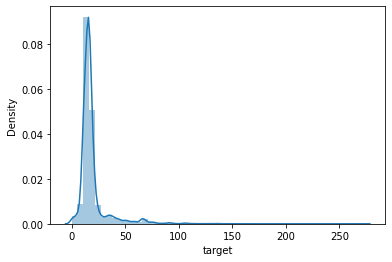

In [127]:
sns.distplot(y_train)

In [12]:
trainset = df[df['clear_date'].isnull()==False]
testset = df[df['clear_date'].isnull()==True]

In [128]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)


LinearRegression()

In [129]:
y_predict = base_model.predict(X_inter_test)

In [130]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_inter_test, y_predict, squared=False)

12.500971626111399

In [131]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [132]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [133]:
y_predict2 = regressor.predict(X_inter_test)
mean_squared_error(y_inter_test, y_predict2, squared=False)

9.170777006553868